<a href="https://colab.research.google.com/github/ibnumuhammad/testrepo/blob/main/2101202077_ibnu_muhammad_hamri.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [73]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [74]:
ls /content/drive/MyDrive/Colab\ Notebooks/

'2101202077_ibnu muhammad hamri.ipynb'   'Latihan 1.ipynb'
 3scene/                                 'tugas statistik'/
'Copy of classify_iris_ANN.ipynb'         Untitled
'Copy of scene_dataset using ANN.ipynb'


In [75]:
cd /content/drive/MyDrive/Colab\ Notebooks

/content/drive/MyDrive/Colab Notebooks


In [76]:
#import library
import glob
import pandas as pd
from matplotlib import pyplot as plt
import cv2
from keras.models import Sequential
from keras.layers.core import Activation
from keras.layers.core import Flatten
from keras.layers.core import Dense
from keras.optimizers import Adam
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from PIL import Image
from imutils import paths
import numpy as np
import os
from tqdm import tqdm
import random
from itertools import chain
from keras.preprocessing.image import ImageDataGenerator

In [77]:
h = glob.glob('/content/drive/MyDrive/Colab Notebooks/3scene/*/*')
# print(h)

In [78]:

data = []

for i in h:
  data = np.append(data,i)

In [79]:
data

array(['/content/drive/MyDrive/Colab Notebooks/3scene/coast/coast_arnat59.jpg',
       '/content/drive/MyDrive/Colab Notebooks/3scene/coast/coast_art487.jpg',
       '/content/drive/MyDrive/Colab Notebooks/3scene/coast/coast_art1130.jpg',
       '/content/drive/MyDrive/Colab Notebooks/3scene/coast/coast_art294.jpg',
       '/content/drive/MyDrive/Colab Notebooks/3scene/coast/coast_bea1.jpg',
       '/content/drive/MyDrive/Colab Notebooks/3scene/coast/coast_bea14.jpg',
       '/content/drive/MyDrive/Colab Notebooks/3scene/coast/coast_bea10.jpg',
       '/content/drive/MyDrive/Colab Notebooks/3scene/coast/coast_bea24.jpg',
       '/content/drive/MyDrive/Colab Notebooks/3scene/coast/coast_bea20.jpg',
       '/content/drive/MyDrive/Colab Notebooks/3scene/coast/coast_bea2.jpg',
       '/content/drive/MyDrive/Colab Notebooks/3scene/coast/coast_bea26.jpg',
       '/content/drive/MyDrive/Colab Notebooks/3scene/coast/coast_bea38.jpg',
       '/content/drive/MyDrive/Colab Notebooks/3scene/coast/

In [80]:
len(h)

948

In [81]:
data = '/content/drive/MyDrive/Colab Notebooks/3scene'

In [82]:
nama_file = []
label = []
full_path = []
for path, subdirs, file in os.walk(data):
  for nama in file:
    full_path.append(os.path.join(path, nama))
    label.append(os.path.basename(path))
    nama_file.append(nama)

In [83]:


df = pd.DataFrame({"path":full_path,'file_name':nama_file,"label":label})
df.groupby(['label']).size()

label
coast      360
forest     328
highway    260
dtype: int64

In [84]:
df['file_name']=df['file_name'].apply(lambda x: str(x))

In [85]:
df['file_name']

0      coast_arnat59.jpg
1       coast_art487.jpg
2      coast_art1130.jpg
3       coast_art294.jpg
4         coast_bea1.jpg
             ...        
943    forest_urb767.jpg
944    forest_text75.jpg
945    forest_text81.jpg
946    forest_text90.jpg
947    forest_urb753.jpg
Name: file_name, Length: 948, dtype: object

In [86]:
df = df.sort_values(by=['file_name'])

In [87]:
df.head()

,path,file_name,label
0,/content/drive/MyDrive/Colab Notebooks/3scene/...,coast_arnat59.jpg,coast
2,/content/drive/MyDrive/Colab Notebooks/3scene/...,coast_art1130.jpg,coast
3,/content/drive/MyDrive/Colab Notebooks/3scene/...,coast_art294.jpg,coast
1,/content/drive/MyDrive/Colab Notebooks/3scene/...,coast_art487.jpg,coast
4,/content/drive/MyDrive/Colab Notebooks/3scene/...,coast_bea1.jpg,coast


In [88]:
data = df[(df.label=='forest')]
data1 = df[(df.label=='coast')]
data2 = df[(df.label=='highway')]

In [89]:
data

,path,file_name,label
621,/content/drive/MyDrive/Colab Notebooks/3scene/...,forest_art114.jpg,forest
620,/content/drive/MyDrive/Colab Notebooks/3scene/...,forest_bost100.jpg,forest
622,/content/drive/MyDrive/Colab Notebooks/3scene/...,forest_bost101.jpg,forest
625,/content/drive/MyDrive/Colab Notebooks/3scene/...,forest_bost102.jpg,forest
623,/content/drive/MyDrive/Colab Notebooks/3scene/...,forest_bost103.jpg,forest
...,...,...,...
944,/content/drive/MyDrive/Colab Notebooks/3scene/...,forest_text75.jpg,forest
945,/content/drive/MyDrive/Colab Notebooks/3scene/...,forest_text81.jpg,forest
946,/content/drive/MyDrive/Colab Notebooks/3scene/...,forest_text90.jpg,forest
947,/content/drive/MyDrive/Colab Notebooks/3scene/...,forest_urb753.jpg,forest


In [90]:
data_gambar = '/content/drive/MyDrive/Colab Notebooks/3scene/*/*'
dg = glob.glob(data_gambar)

In [91]:
dg

['/content/drive/MyDrive/Colab Notebooks/3scene/coast/coast_arnat59.jpg',
 '/content/drive/MyDrive/Colab Notebooks/3scene/coast/coast_art487.jpg',
 '/content/drive/MyDrive/Colab Notebooks/3scene/coast/coast_art1130.jpg',
 '/content/drive/MyDrive/Colab Notebooks/3scene/coast/coast_art294.jpg',
 '/content/drive/MyDrive/Colab Notebooks/3scene/coast/coast_bea1.jpg',
 '/content/drive/MyDrive/Colab Notebooks/3scene/coast/coast_bea14.jpg',
 '/content/drive/MyDrive/Colab Notebooks/3scene/coast/coast_bea10.jpg',
 '/content/drive/MyDrive/Colab Notebooks/3scene/coast/coast_bea24.jpg',
 '/content/drive/MyDrive/Colab Notebooks/3scene/coast/coast_bea20.jpg',
 '/content/drive/MyDrive/Colab Notebooks/3scene/coast/coast_bea2.jpg',
 '/content/drive/MyDrive/Colab Notebooks/3scene/coast/coast_bea26.jpg',
 '/content/drive/MyDrive/Colab Notebooks/3scene/coast/coast_bea38.jpg',
 '/content/drive/MyDrive/Colab Notebooks/3scene/coast/coast_bea3.jpg',
 '/content/drive/MyDrive/Colab Notebooks/3scene/coast/coast_b

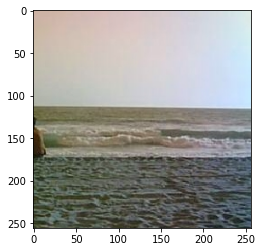

In [92]:
im = cv2.imread(dg[300])
plt.imshow(im)

In [93]:
# Augmentation
def train_generator(df, batch_size, aug_dict,
                   image_color_mode = "rgb",
                   image_save_prefix = "image",
                   save_to_dir = None,
                   target_size = (256, 256),
                   seed=1):
    """
    Returns sequence of Augmented images
    by reading the path names from the dataframe
    """
    
    image_datagen = ImageDataGenerator(**aug_dict)
    
    image_generator = image_datagen.flow_from_dataframe(
                        df,
                        x_col='images',
                        class_mode=None,
                        color_mode = image_color_mode,
                        target_size = target_size,
                        batch_size = batch_size,
                        save_to_ir = save_to_dir,
                        save_prefix = image_save_prefix,
                        seed = seed
    )
    
    train_gen = zip(image_generator)
    
    for (img) in train_gen:
        img = adjust_data(img)
        yield (img)

In [94]:
def adjust_data(img):
  img = img /255
  return (img)

In [95]:
WIDTH = HEGIHT = 256

In [96]:
print("[INFO] loading images...")
imagePaths = paths.list_images('3scene')
data = []
labels = []

[INFO] loading images...


In [97]:
# loop over our input images
for imagePath in imagePaths:
	# load the input image from disk, resize it to 64x64 pixels, scale
	# the pixel intensities to the range [0, 1], and then update our
	# images list
	image = Image.open(imagePath)
 #bisa pasang preprocessing disini jika mau, seperti filterring, dll
	image = np.array(image.resize((64, 64))) / 255.0 #normalisasi
	data.append(image)

	# extract the class label from the file path and update the
	# labels list
	label = imagePath.split(os.path.sep)[-2]
	labels.append(label)

In [98]:
print(labels)

['coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 

In [99]:
lb = LabelBinarizer()
labels = lb.fit_transform(labels)

In [100]:
print(labels)

[[1 0 0]
 [1 0 0]
 [1 0 0]
 ...
 [0 1 0]
 [0 1 0]
 [0 1 0]]


In [101]:
print(np.array(data).shape)

(948, 64, 64, 3)


In [102]:
(trainX, testX, trainY, testY) = train_test_split(np.array(data),	np.array(labels), test_size=0.25)
print(trainX.shape)
print(testX.shape)

(711, 64, 64, 3)
(237, 64, 64, 3)


In [103]:
from keras.models import Sequential
from keras.layers.core import Flatten
from keras.layers.core import Dense, Dropout

model = Sequential(
    [
        Flatten(input_shape=(64*64*3,)),
        Dense(256, activation="relu"),
        Dense(128, activation="relu"),
        Dropout(0.3),
        Dense(64, activation="relu"),
        Dense(32, activation="relu"),
        Dropout(0.3),
        Dense(16, activation="relu"),
        Dense(8, activation="relu"),
        Dense(3, activation = "softmax"),
    ]
)

In [104]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 12288)             0         
_________________________________________________________________
dense_14 (Dense)             (None, 256)               3145984   
_________________________________________________________________
dense_15 (Dense)             (None, 128)               32896     
_________________________________________________________________
dropout_4 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_16 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_17 (Dense)             (None, 32)                2080      
_________________________________________________________________
dropout_5 (Dropout)          (None, 32)               

In [105]:
print("[INFO] training network...")
opt = Adam(lr=1e-3, decay= 1e-3)
model.compile(loss='categorical_crossentropy',optimizer=opt, metrics=["accuracy"])
H = model.fit(trainX,trainY, validation_data=(testX, testY), epochs=50, batch_size=32)

[INFO] training network...
Epoch 1/50
23/23 [==============================] - 1s 37ms/step - loss: 1.2103 - accuracy: 0.3753 - val_loss: 1.0925 - val_accuracy: 0.4135
Epoch 2/50
23/23 [==============================] - 1s 26ms/step - loss: 1.0872 - accuracy: 0.3842 - val_loss: 1.0858 - val_accuracy: 0.4135
Epoch 3/50
23/23 [==============================] - 1s 25ms/step - loss: 1.1082 - accuracy: 0.3525 - val_loss: 1.0802 - val_accuracy: 0.4093
Epoch 4/50
23/23 [==============================] - 1s 26ms/step - loss: 1.0824 - accuracy: 0.3996 - val_loss: 1.0825 - val_accuracy: 0.4473
Epoch 5/50
23/23 [==============================] - 1s 26ms/step - loss: 1.0837 - accuracy: 0.4171 - val_loss: 1.0732 - val_accuracy: 0.4304
Epoch 6/50
23/23 [==============================] - 1s 27ms/step - loss: 1.0800 - accuracy: 0.3729 - val_loss: 1.0793 - val_accuracy: 0.4473
Epoch 7/50
23/23 [==============================] - 1s 28ms/step - loss: 1.0730 - accuracy: 0.4313 - val_loss: 1.0656 - val_acc

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


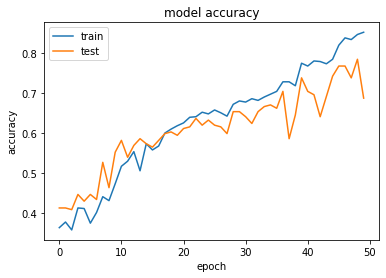

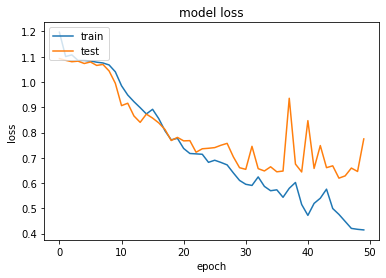

In [106]:
import matplotlib.pyplot as plt

print(H.history.keys())
# summarize history for accuracy
plt.plot(H.history['accuracy'])
plt.plot(H.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(H.history['loss'])
plt.plot(H.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [107]:
# evaluate the network
print("[INFO] evaluating network...")
predictions = model.predict(testX, batch_size=32)
print(classification_report(testY.argmax(axis=1),
	predictions.argmax(axis=1), target_names=lb.classes_))

[INFO] evaluating network...
              precision    recall  f1-score   support

       coast       0.63      0.91      0.74        98
      forest       0.93      0.69      0.79        74
     highway       0.57      0.35      0.44        65

    accuracy                           0.69       237
   macro avg       0.71      0.65      0.66       237
weighted avg       0.71      0.69      0.67       237

